In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [13]:
start = dt.datetime(2017,4,1)
end = dt.datetime.today()
ticker = '^NSEI'

a = yf.download(ticker,start,end)
df = pd.DataFrame(a)

[*********************100%%**********************]  1 of 1 completed


In [14]:
df.drop(columns = ['Volume','Close','Open','High','Low'],inplace = True)
df.rename(columns = {'Adj Close':'Close'},inplace = True)

In [15]:
df['returns'] = df['Close'].pct_change()

df['gain'] = np.where(df['returns']>0,df['Close'].diff(),0)
df['loss'] = np.where(df['returns']<0,df['Close'].diff(),0)

df['avrg_gain'] = df['gain'].rolling(window = 10).mean()
df['avrg_loss'] = abs(df['loss'].rolling(window = 10).mean())

df['RS'] = df['avrg_gain'] / df['avrg_loss']
df['RSI'] = 100 - (100/(1 + df['RS']))

In [16]:
df['stdev'] = df['Close'].std()
df['mean'] = df['Close'].rolling(window = 10).mean()

df['lower_band'] = df['mean'] - (2*df['stdev'])

df['ema'] = df['Close'].ewm(span = 10 , adjust = False).mean() 

In [17]:
df['positions1'] = np.where(df['Close']<df['lower_band'],1,0)
df['positions1'] = df['positions1'].shift(1)

df['positions2'] = np.where(df['RSI']<30,1,0)
df['positions2'] = df['positions2'].shift(1)

df['positions3'] = np.where(df['Close']<df['ema'],1,0)
df['positions3'] = df['positions3'].shift(1)

df['Cum_positions'] = df['positions1'] + df['positions2'] + df['positions3']

In [18]:
for i in range(len(df['Close'])):
    if df['Cum_positions'].iloc[i] == 2:
        df['Cum_positions'].iloc[i] = 1
    else:
        pass

In [19]:
df['strategy_returns'] = df['returns']*df['Cum_positions']

In [20]:
df['returns'] = df['returns'] +1
df['strategy_returns'] = df['strategy_returns'] +1

<Axes: xlabel='Date'>

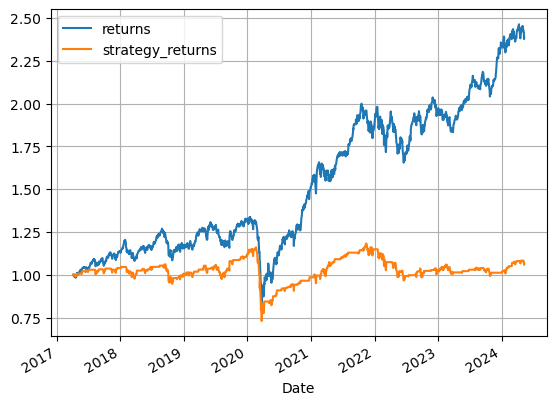

In [21]:
df[['returns','strategy_returns']].cumprod().plot(grid = True)

In [22]:
df['Cum_positions'].value_counts()

0.0    1105
1.0     644
Name: Cum_positions, dtype: int64